# Analyse de données médicales

Import des librairies nécessaires :

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import du fichier csv :

In [73]:
df = pd.read_csv('medical_examination.csv')

In [97]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,False


Ajout d'une colonne surpoids. Si le patient possède un IMC de plus de 25 : True

In [80]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25

### Normalisation des données 
Si cholestérol ou gluc est supérieur ou = à 1 alors on affiche 1.

In [87]:
chol_gluc_dict = { 1: 0, 2: 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map(chol_gluc_dict)
df['gluc'] = df['gluc'].map(chol_gluc_dict)

### I) Comparaison du profil entre patients avec pb cardiaque et sans problèmes

Mise en forme des données (pd.melt pour passer en format long)

In [92]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=[
                     'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [93]:
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(
        columns={'value': 'total'}).reset_index()

Mise en forme du graph :

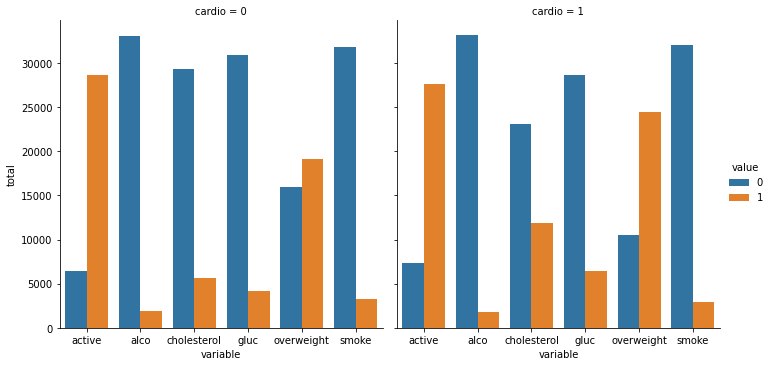

In [90]:
sns.catplot(x='variable', y='total', data=df_cat,
                hue='value', col='cardio', kind='bar')

## II) Heatmap

### Data cleaning
Enlever les valeurs aberrantes

In [95]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

### Création de la matrice

<AxesSubplot:>

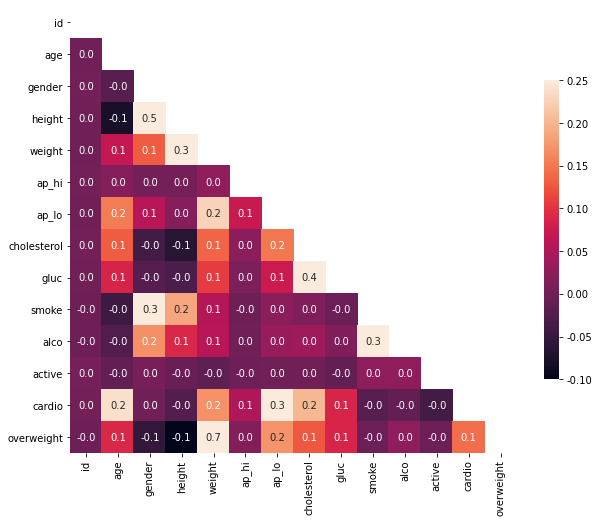

In [96]:
# calcul de la matrice
corr = df_heat.corr()

# Afin de ne pas afficher 2 fois les mêmes correlations. On enlève la partie droit au dessus de la diagonale. (Technique détaillée dans la doc de Seaborn)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Création du canvas
plt.subplots(figsize=(10, 10))

# Mise en forme de la heatmap
sns.heatmap(corr,annot=True, fmt='.1f', square= True, mask=mask, vmin=-0.1,vmax=0.25,cbar_kws={'shrink':0.55, 'format':'%.2f'})